In [1]:
#importando a biblioteca
import pandas as pd


In [2]:
# leitura de arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [3]:
#juntando todos os arquivos

df = pd.concat([df1, df2,df3,df4,df5])

In [4]:
#visualizando as 05 primeiros linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [5]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [6]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [7]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
95,Fortaleza,2019-01-01,35.28,1002,2
39,Natal,2019-01-10,504.00,854,3
119,Recife,2019-03-02,152.30,982,7
4,Recife,2019-02-14,19.89,983,7
193,Salvador,2019-01-02,3.97,1036,2


In [8]:
df["LojaID"] = df["LojaID"].astype("object")

In [9]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

**Trabalhando valores faltantes**

In [10]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [11]:
df["Vendas"].fillna(df["Vendas"].mean(), inplace = True)

In [12]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [13]:
# Para esses arquivos não existem valores nulos

In [14]:
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [15]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [16]:
df["Receitas/Vendas"] = df["Receita"] / df["Vendas"]

In [17]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [18]:
df["Receita"].min()

3.34

In [19]:
df["Receita"].max()

3544.0

In [20]:
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [21]:
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [22]:
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [23]:
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


In [25]:
# Transformando em datas
df["Data"] = pd.to_datetime(df["Data"])

In [26]:
df.dtypes

Cidade                     object
Data               datetime64[ns]
Vendas                    float64
LojaID                     object
Qtde                        int64
Receita                   float64
Receitas/Vendas           float64
dtype: object

In [27]:
#agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [28]:
#Criando uma nova coluna com o ano

df["Ano_Venda"] = df["Data"].dt.year

In [29]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_Venda
136,Salvador,2019-03-02,13.81,1036,1,13.81,1.0,2019
36,Natal,2019-02-09,328.00,853,2,656.00,2.0,2019
104,Fortaleza,2019-01-01,40.50,1005,2,81.00,2.0,2019
71,Salvador,2019-01-01,21.36,1035,2,42.72,2.0,2019
134,Salvador,2019-03-02,125.90,1036,1,125.90,1.0,2019


In [30]:
#Extraindo o mês e o dia 

df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [31]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda
48,Recife,2019-01-01,141.19,980,7,988.33,7.0,2019,1,1
35,Fortaleza,2019-01-01,133.97,1005,2,267.94,2.0,2019,1,1
13,Salvador,2019-02-12,39.29,1035,1,39.29,1.0,2019,2,12
153,Natal,2019-01-02,17.41,1035,2,34.82,2.0,2019,1,2
50,Salvador,2019-01-01,44.87,1036,3,134.61,3.0,2019,1,1


In [32]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [33]:
#calculando a diferença entre dias

df["diferença_dias"] = df["Data"] - df["Data"].min()

In [34]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda,diferença_dias
22,Aracaju,2018-01-01,150.94,1522,1,150.94,1.0,2018,1,1,0 days
6,Aracaju,2018-01-01,35.50,1522,2,71.00,2.0,2018,1,1,0 days
167,Natal,2019-01-02,36.42,1037,1,36.42,1.0,2019,1,2,366 days
89,Aracaju,2018-01-01,10.15,1523,7,71.05,7.0,2018,1,1,0 days
119,Fortaleza,2019-03-02,152.30,982,7,1066.10,7.0,2019,3,2,425 days


In [36]:
#Criando coluna trimestre

df["trimeste_vendas"] = df["Data"].dt.quarter

df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda,diferença_dias,semestre_vendas,trimeste_vendas
7,Fortaleza,2019-02-11,35.50,1003,2,71.00,2.0,2019,2,11,406 days,1,1
121,Fortaleza,2019-03-02,41.55,981,3,124.65,3.0,2019,3,2,425 days,1,1
127,Salvador,2019-03-02,240.61,1035,3,721.83,3.0,2019,3,2,425 days,1,1
14,Recife,2019-01-12,102.91,982,3,308.73,3.0,2019,1,12,376 days,1,1
25,Aracaju,2018-01-01,34.66,1521,8,277.28,8.0,2018,1,1,0 days,1,1


In [41]:
#Filtrando as vendas de 2019 do mês de março

vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda,diferença_dias,semestre_vendas,trimeste_vendas
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1,1


#**Visualização de dados**

In [42]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

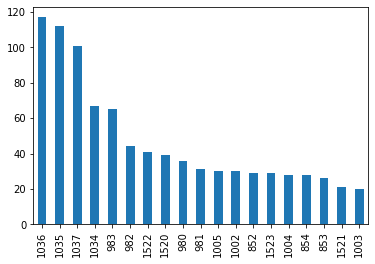

In [45]:
#Barras verticais
df["LojaID"].value_counts(ascending=False).plot.bar()

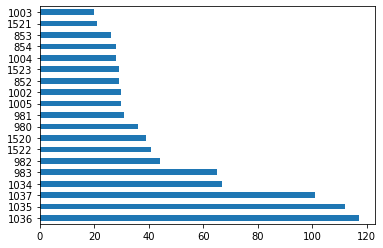

In [46]:
#Barras horizontais

df["LojaID"].value_counts(ascending=False).plot.barh()

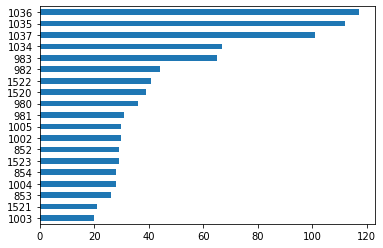

In [49]:
df["LojaID"].value_counts(ascending=True).plot.barh(); #ordenado

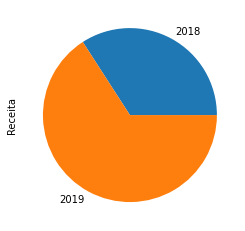

In [52]:
#Gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [53]:
#Total de vandas por cidade

df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

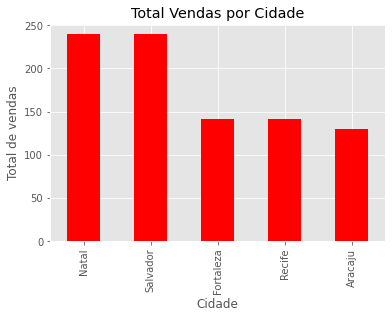

In [64]:
#Formatando o gráfico

import matplotlib.pyplot as plt

df["Cidade"].value_counts().plot.bar(title="Total Vendas por Cidade", color = "red")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas")
plt.style.use("ggplot")


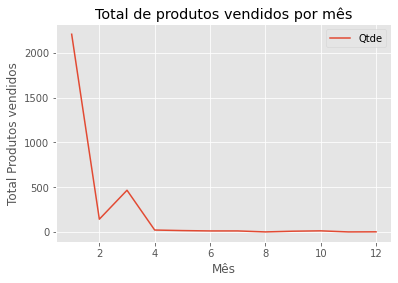

In [67]:

df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total de produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos vendidos")
plt.legend()

In [68]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [72]:
df_2019 = df[df["Ano_Venda"] == 2019]

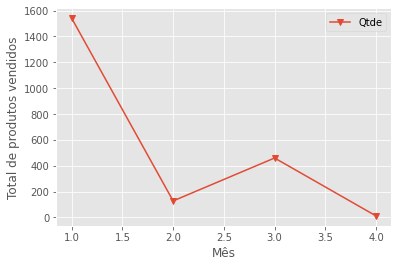

In [73]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend()

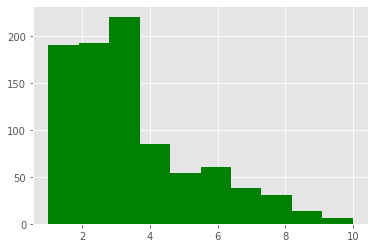

In [78]:
plt.hist(df["Qtde"], color = "green");

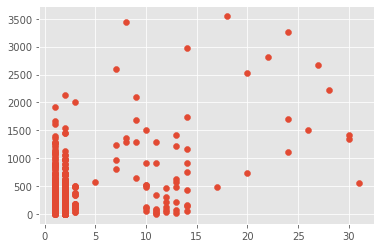

In [79]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"])

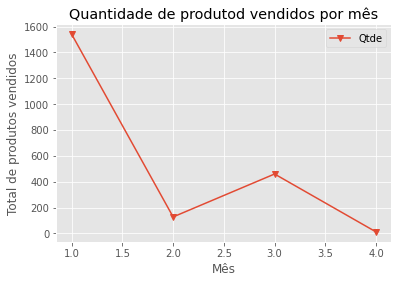

In [82]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtod vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend()
plt.savefig("grafico QTDE x MES.png")